<a href="https://colab.research.google.com/github/kutikova2016/see-me/blob/master/NNsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
#torch.random.seed(34)

In [0]:
l = 8
X_train = torch.rand(150)*(l*2) - l
y_train = torch.sin(X_train)
X_train.unsqueeze_(1)
y_train.unsqueeze_(1);
#plt.plot(X_train, y_train, 'o')

In [0]:
noise = torch.randn(y_train.shape)/5

In [0]:
y_train += noise
#plt.plot(X_train, y_train, 'o')

In [0]:
class SinNet(torch.nn.Module):
    def __init__(self, n_hidden_nervous):
        super(SinNet, self).__init__()
        self.fc1  = torch.nn.Linear(1, n_hidden_nervous)
        self.act1 = torch.nn.Sigmoid()
        self.fc2  = torch.nn.Linear(n_hidden_nervous, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
snet = SinNet(50)
#snet.forward(X_train)

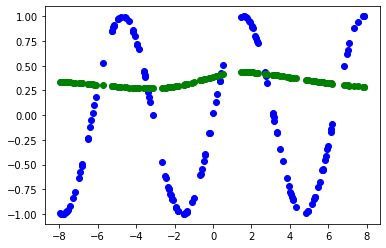

In [0]:
def predict(net, x):
    y_ = net.forward(x)
    y = torch.sin(x)
    plt.plot(x.numpy(), y.numpy(), 'o', c='b')
    plt.plot(x.numpy(), y_.data.numpy(), 'o', c='g')
predict(snet, X_train)

In [0]:
optimizer = torch.optim.Adam(snet.parameters(), lr = 0.01)
loss = lambda pred, target: ((pred-target)**2).mean()

In [0]:
loss(torch.tensor([1., 3.]), torch.tensor([-3., 0.]))

tensor(12.5000)

In [0]:
def learn(n):
  for epoch_index in range(n):
    optimizer.zero_grad()

    y_pred = snet.forward(X_train)
    loss_val = loss(y_pred, y_train)
    loss_val.backward()

    optimizer.step()
  predict(snet, X_train)

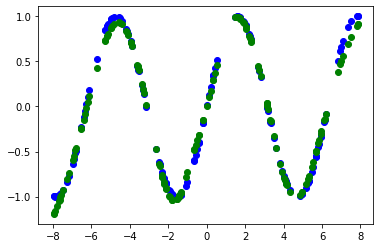

In [0]:
learn(1000)

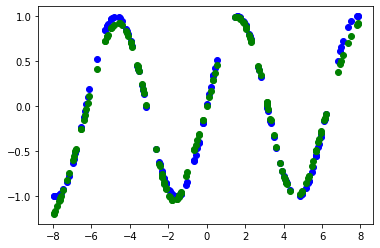

In [0]:
learn(40)

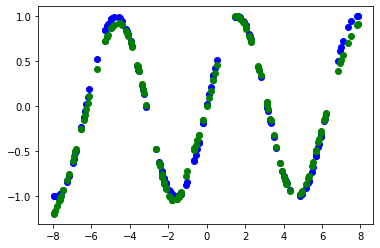

In [0]:
learn(40)

In [0]:
import torch

class RegressionNet(torch.nn.Module):
    # your code here
    def __init__(self, n):
        


net = RegressionNet()

def target_function(x):
    return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:

def metric(pred, target):
    return (pred - target).abs().mean()

optimizer = torch.optim.Adam(net.parameters(), lr=#choose your step#)

def loss(pred, target):
    # your code here

for epoch_index in range(#choose epoches number#):
    optimizer.zero_grad()

    y_pred = # make forward
    loss_value = loss(y_pred, y_train)
    # make backward
    # make step

print(metric(net.forward(x_validation), y_validation).item())